<a href="https://colab.research.google.com/github/M-H-Amini/MachineLearning-AUT/blob/master/MLe_Lec2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Machine Learning *elementary* Course
## Amirkabir University of Technology
### Mohammad Hossein Amini (mhamini@aut.ac.ir)
# Lecture 2 - Logistic Regression

<img src="https://drive.google.com/uc?id=144SDpgv7EEy6Og1ZFNIv_nBaugKGiSCE" width="400">



# Introduction

The theoretical stuff has been discussed in the video lectures. Let's implement a little...

First of all, we should import some modules.

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.2.0


# Discovering Sigmoid
Let's see **sigmoid** function in action.

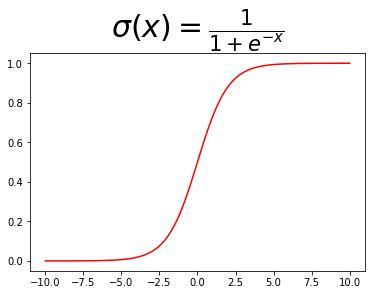

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))


x = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(x, sigmoid(x), 'r')
plt.title(r'$\sigma (x) = \frac{1}{1+e^{-x}} $', fontsize = 30)
plt.show()

<img src="https://drive.google.com/uc?id=1SdMUDfOhtOsfDMiDVsE4InR5fVSOAvF2" width="300">


# Logistic Regression (Hand Coding!)
Let's implement some simple examples just using **numpy**!

First of all, let's create a simple dataset.

In [0]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


A simple function to show the situation can be so helpful.

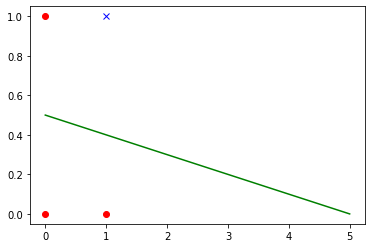

In [0]:
def show(x, y, w=None):
  label = {0: 'ro', 1: 'bx'}
  plt.figure()
  for i in range(y.shape[0]):
    plt.plot(x[i, 0], x[i, 1], label[y[i, 0]])
  if w is not None:
    p1 = (0, -w[0, 0]/w[2, 0])
    p2 = (-w[0, 0]/w[1, 0], 0)
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g')
  plt.show()

w = np.array([[-0.5], [0.1], [1]])
show(x, y, w)

Just like the **Linear Regression** Notebook, we implement functions **h** and **train_step**.

In [0]:
alpha = 0.1
def h(x, w, has_bias = True):
  if not has_bias:
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
  return sigmoid(np.dot(x, w))
def train_step(x, y, w):
  x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
  w = w + alpha*np.dot(x.T , (y-h(x, w)))
  return w

print('Before: ', w.T)
w = train_step(x[0:1, :], y[0:1, :], w)
print('After: ', w.T)

Before:  [[-0.5  0.1  1. ]]
After:  [[-0.53775407  0.1         1.        ]]


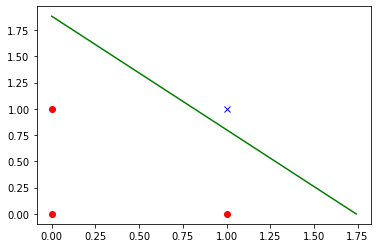

In [0]:
#index = np.random.randint(0, y.shape[0])
alpha = 0.1
index = 3
w = train_step(x[index:index+1, :], y[index:index+1, :], w)
show(x, y, w)

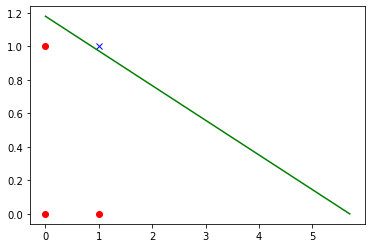

In [0]:
alpha = 0.01
for i in range(100):
  index = np.random.randint(0, y.shape[0])
  w = train_step(x[index:index+1, :], y[index:index+1, :], w)

show(x, y, w)

# Importing Dataset
Today, we'll be using **Heart Disease UCI** dataset. It predicts the likelihood of a patient having heart disease. Let's import it in our program.

In [0]:
ds = pd.read_csv('heart.csv')
ds = ds.sample(frac=1).reset_index(drop=True)
y = np.array(ds['target'])
y = y[:, np.newaxis]
ds = ds.drop(columns=['target'])
x = np.array(ds)
#maximum = np.array(ds.max())
#ds = ds/maximum

In [0]:
split = 0.8
no_of_trains = int(ds.shape[0]*split)
X_train = x[:no_of_trains, :]
Y_train = y[:no_of_trains, :]
X_test = x[no_of_trains:, :]
Y_test = y[no_of_trains:, :]

# Tensorflow Codes
Our implementation in tensorflow is much like the previous session.

In [0]:
X = tf.constant(X_train, dtype=tf.float32)
Y = tf.constant(Y_train, dtype=tf.float32)

w = tf.Variable(np.random.randn(X.shape[1]+1, 1), dtype=tf.float32)

In [0]:
def h(x, w):
  x = tf.concat((tf.ones((x.shape[0], 1)), x), axis=1)
  return tf.sigmoid(tf.matmul(x,w))

def cost(x, y, w):
  return tf.reduce_mean(tf.losses.binary_crossentropy(y, h(x, w)))

In [0]:
optimizer = tf.optimizers.Adam()
#w = tf.Variable(np.random.randn(X.shape[1]+1, 1), dtype=tf.float32)
w = tf.Variable(np.zeros((X.shape[1]+1, 1)), dtype=tf.float32)

def train_step(x, y, w, verbose=0):
  with tf.GradientTape() as t:
    J = cost(x, y, w)
  if verbose:
    print('Loss: {}'.format(J))
  w_grads = t.gradient(J, w)
  optimizer.apply_gradients(zip([w_grads], [w]))
  return w

print('Before: ', w)
w = train_step(X[index:index+1, :], Y[index:index+1, :], w, verbose = 1)
print('After: ', w)
print(cost(X, Y, w))

Before:  <tf.Variable 'Variable:0' shape=(14, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>
Loss: 0.6931469440460205
After:  <tf.Variable 'Variable:0' shape=(14, 1) dtype=float32, numpy=
array([[-0.00099999],
       [-0.001     ],
       [-0.00099999],
       [-0.00099999],
       [-0.001     ],
       [-0.001     ],
       [ 0.        ],
       [-0.00099999],
       [-0.001     ],
       [ 0.        ],
       [-0.00099998],
       [-0.001     ],
       [ 0.        ],
       [-0.001     ]], dtype=float32)>
tf.Tensor(0.7812636, shape=(), dtype=float32)


<img src="https://drive.google.com/uc?id=17X8qdM19JAlv53hlNJSolrRjXYfaOel-" width="300">


In [0]:
def train(X, Y, max_iters=1000, min_cost=0.01, w=None, verbose=0):
  if w is None:
    w = tf.Variable(np.random.randn(X.shape[1]+1, 1), dtype=tf.float32)
  for i in range(max_iters):
    index = np.random.randint(0, X.shape[0])
    w = train_step(X[index:index+1, :], Y[index:index+1, :], w)
    if verbose:
      print('Cost: ', cost(X, Y, w).numpy())
  print("Training Done...")
  print("Cost: {}".format(cost(X, Y, w).numpy()))
  print("w = ", w)
  return w

w = train(X, Y, w=w, max_iters=1000, verbose=0)

Training Done...
Cost: 0.44848954677581787
w =  <tf.Variable 'Variable:0' shape=(14, 1) dtype=float32, numpy=
array([[-2.29933020e-03],
       [-1.07522318e-02],
       [-3.18030089e-01],
       [ 3.52607965e-01],
       [-1.54865347e-02],
       [-1.53558271e-04],
       [ 1.20171964e-01],
       [ 1.61256105e-01],
       [ 2.62872521e-02],
       [-3.57862085e-01],
       [-2.99847782e-01],
       [ 9.77056101e-02],
       [-3.57674539e-01],
       [-1.08083367e-01]], dtype=float32)>


In [0]:
predictions = h(X_test, w)
for i in range(X_test.shape[0]):
  print('No {:2}, Target: {}, Output: {:.2f}'.format(i+1, Y_test[i,0], predictions.numpy()[i,0]))

No  1, Target: 1, Output: 0.85
No  2, Target: 0, Output: 0.22
No  3, Target: 0, Output: 0.34
No  4, Target: 0, Output: 0.38
No  5, Target: 1, Output: 0.88
No  6, Target: 1, Output: 0.76
No  7, Target: 1, Output: 0.72
No  8, Target: 1, Output: 0.90
No  9, Target: 1, Output: 0.33
No 10, Target: 0, Output: 0.30
No 11, Target: 0, Output: 0.22
No 12, Target: 1, Output: 0.69
No 13, Target: 1, Output: 0.31
No 14, Target: 1, Output: 0.75
No 15, Target: 1, Output: 0.85
No 16, Target: 0, Output: 0.13
No 17, Target: 1, Output: 0.50
No 18, Target: 0, Output: 0.63
No 19, Target: 0, Output: 0.17
No 20, Target: 0, Output: 0.25
No 21, Target: 0, Output: 0.45
No 22, Target: 0, Output: 0.84
No 23, Target: 1, Output: 0.71
No 24, Target: 0, Output: 0.52
No 25, Target: 0, Output: 0.85
No 26, Target: 0, Output: 0.07
No 27, Target: 0, Output: 0.22
No 28, Target: 0, Output: 0.43
No 29, Target: 1, Output: 0.79
No 30, Target: 0, Output: 0.34
No 31, Target: 0, Output: 0.14
No 32, Target: 0, Output: 0.06
No 33, T